In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
torch.set_default_device('cpu')

import numpy as np

from transformers_simple.transformer import GPT
from transformers_simple.train import Trainer
from transformers_simple.dataset import CharDataset

In [2]:
N = 4
block_size  = 2
embed_size  = 6
hidden_size = 30
attn_hidden_size = 30
output_size = 3
num_heads   = 3
vocab_size  = 3
num_transformer_blocks = 2

log_interval = 10
epochs = 5
learning_rate = 1e-4
device = torch.device('cpu')

In [3]:
# #block size 1
# data = "".join(["abca"]*1000)

In [4]:
# block size 2
data = "".join(["aabcacb"]*1000)

In [5]:
dataset = CharDataset(data=data, block_size=block_size)
dataset[0]

(tensor([0, 0]), tensor([0, 1]))

In [6]:
net = GPT(vocab_size=vocab_size, 
          block_size=block_size,
          embed_size=embed_size,
          hidden_size=hidden_size,
          attn_hidden_size=attn_hidden_size,
          output_size=output_size,
          num_transformer_blocks=num_transformer_blocks,
          num_heads=num_heads)

In [7]:
x = dataset[0][0].view(1,-1)

In [8]:
x

tensor([[0, 0]])

In [9]:
loss = torch.nn.CrossEntropyLoss()

def loss_fn(o,y):
    return loss(o.view(-1,vocab_size),y.view(-1))

In [10]:
trainer = Trainer(model=net, 
                  dataset=dataset, 
                  loss_fn=loss_fn, 
                  batch_size=N, 
                  learning_rate=learning_rate,
                  epochs=epochs, 
                  log_interval=log_interval, 
                  device=device)

In [11]:
trainer.run()

Train Epoch: 0 [0/6998 (0%)]	Loss: 0.942398
Train Epoch: 0 [40/6998 (1%)]	Loss: 1.166952
Train Epoch: 0 [80/6998 (1%)]	Loss: 0.971728
Train Epoch: 0 [120/6998 (2%)]	Loss: 1.170824
Train Epoch: 0 [160/6998 (2%)]	Loss: 0.927851
Train Epoch: 0 [200/6998 (3%)]	Loss: 1.394247
Train Epoch: 0 [240/6998 (3%)]	Loss: 0.963428
Train Epoch: 0 [280/6998 (4%)]	Loss: 1.283580
Train Epoch: 0 [320/6998 (5%)]	Loss: 1.572558
Train Epoch: 0 [360/6998 (5%)]	Loss: 1.248560
Train Epoch: 0 [400/6998 (6%)]	Loss: 1.283190
Train Epoch: 0 [440/6998 (6%)]	Loss: 1.131449
Train Epoch: 0 [480/6998 (7%)]	Loss: 1.032344
Train Epoch: 0 [520/6998 (7%)]	Loss: 0.681972
Train Epoch: 0 [560/6998 (8%)]	Loss: 1.078181
Train Epoch: 0 [600/6998 (9%)]	Loss: 1.037631
Train Epoch: 0 [640/6998 (9%)]	Loss: 1.080605
Train Epoch: 0 [680/6998 (10%)]	Loss: 1.123462
Train Epoch: 0 [720/6998 (10%)]	Loss: 1.291063
Train Epoch: 0 [760/6998 (11%)]	Loss: 1.052488
Train Epoch: 0 [800/6998 (11%)]	Loss: 0.919780
Train Epoch: 0 [840/6998 (12%)]	Lo

Train Epoch: 0 [6920/6998 (99%)]	Loss: 0.994903
Train Epoch: 0 [6960/6998 (99%)]	Loss: 0.900607
Train Epoch: 1 [0/6998 (0%)]	Loss: 0.888244
Train Epoch: 1 [40/6998 (1%)]	Loss: 0.992926
Train Epoch: 1 [80/6998 (1%)]	Loss: 0.833579
Train Epoch: 1 [120/6998 (2%)]	Loss: 0.812635
Train Epoch: 1 [160/6998 (2%)]	Loss: 0.755166
Train Epoch: 1 [200/6998 (3%)]	Loss: 0.895605
Train Epoch: 1 [240/6998 (3%)]	Loss: 0.763742
Train Epoch: 1 [280/6998 (4%)]	Loss: 0.731126
Train Epoch: 1 [320/6998 (5%)]	Loss: 0.898645
Train Epoch: 1 [360/6998 (5%)]	Loss: 0.691833
Train Epoch: 1 [400/6998 (6%)]	Loss: 0.807665
Train Epoch: 1 [440/6998 (6%)]	Loss: 0.835370
Train Epoch: 1 [480/6998 (7%)]	Loss: 0.906718
Train Epoch: 1 [520/6998 (7%)]	Loss: 0.809945
Train Epoch: 1 [560/6998 (8%)]	Loss: 0.485971
Train Epoch: 1 [600/6998 (9%)]	Loss: 1.010349
Train Epoch: 1 [640/6998 (9%)]	Loss: 0.846043
Train Epoch: 1 [680/6998 (10%)]	Loss: 0.915248
Train Epoch: 1 [720/6998 (10%)]	Loss: 0.906689
Train Epoch: 1 [760/6998 (11%)]	

Train Epoch: 1 [6840/6998 (98%)]	Loss: 0.864039
Train Epoch: 1 [6880/6998 (98%)]	Loss: 0.720610
Train Epoch: 1 [6920/6998 (99%)]	Loss: 1.329740
Train Epoch: 1 [6960/6998 (99%)]	Loss: 0.870364
Train Epoch: 2 [0/6998 (0%)]	Loss: 0.839345
Train Epoch: 2 [40/6998 (1%)]	Loss: 0.915044
Train Epoch: 2 [80/6998 (1%)]	Loss: 0.938619
Train Epoch: 2 [120/6998 (2%)]	Loss: 0.613115
Train Epoch: 2 [160/6998 (2%)]	Loss: 0.918730
Train Epoch: 2 [200/6998 (3%)]	Loss: 1.051806
Train Epoch: 2 [240/6998 (3%)]	Loss: 0.909929
Train Epoch: 2 [280/6998 (4%)]	Loss: 0.792676
Train Epoch: 2 [320/6998 (5%)]	Loss: 0.587701
Train Epoch: 2 [360/6998 (5%)]	Loss: 0.548391
Train Epoch: 2 [400/6998 (6%)]	Loss: 1.461538
Train Epoch: 2 [440/6998 (6%)]	Loss: 0.695137
Train Epoch: 2 [480/6998 (7%)]	Loss: 0.889556
Train Epoch: 2 [520/6998 (7%)]	Loss: 0.804789
Train Epoch: 2 [560/6998 (8%)]	Loss: 0.777394
Train Epoch: 2 [600/6998 (9%)]	Loss: 0.730071
Train Epoch: 2 [640/6998 (9%)]	Loss: 0.850804
Train Epoch: 2 [680/6998 (10%)

Train Epoch: 2 [6800/6998 (97%)]	Loss: 0.992260
Train Epoch: 2 [6840/6998 (98%)]	Loss: 0.830674
Train Epoch: 2 [6880/6998 (98%)]	Loss: 0.734279
Train Epoch: 2 [6920/6998 (99%)]	Loss: 1.026340
Train Epoch: 2 [6960/6998 (99%)]	Loss: 0.871328
Train Epoch: 3 [0/6998 (0%)]	Loss: 0.628309
Train Epoch: 3 [40/6998 (1%)]	Loss: 0.448963
Train Epoch: 3 [80/6998 (1%)]	Loss: 0.725879
Train Epoch: 3 [120/6998 (2%)]	Loss: 0.786023
Train Epoch: 3 [160/6998 (2%)]	Loss: 1.194601
Train Epoch: 3 [200/6998 (3%)]	Loss: 0.456835
Train Epoch: 3 [240/6998 (3%)]	Loss: 0.645847
Train Epoch: 3 [280/6998 (4%)]	Loss: 0.825302
Train Epoch: 3 [320/6998 (5%)]	Loss: 0.659988
Train Epoch: 3 [360/6998 (5%)]	Loss: 0.515889
Train Epoch: 3 [400/6998 (6%)]	Loss: 0.677950
Train Epoch: 3 [440/6998 (6%)]	Loss: 0.692656
Train Epoch: 3 [480/6998 (7%)]	Loss: 1.092107
Train Epoch: 3 [520/6998 (7%)]	Loss: 0.681245
Train Epoch: 3 [560/6998 (8%)]	Loss: 0.714788
Train Epoch: 3 [600/6998 (9%)]	Loss: 0.672990
Train Epoch: 3 [640/6998 (9%

Train Epoch: 3 [6800/6998 (97%)]	Loss: 0.651209
Train Epoch: 3 [6840/6998 (98%)]	Loss: 0.927097
Train Epoch: 3 [6880/6998 (98%)]	Loss: 0.559239
Train Epoch: 3 [6920/6998 (99%)]	Loss: 0.480138
Train Epoch: 3 [6960/6998 (99%)]	Loss: 0.611232
Train Epoch: 4 [0/6998 (0%)]	Loss: 0.915770
Train Epoch: 4 [40/6998 (1%)]	Loss: 0.936235
Train Epoch: 4 [80/6998 (1%)]	Loss: 0.712743
Train Epoch: 4 [120/6998 (2%)]	Loss: 0.505440
Train Epoch: 4 [160/6998 (2%)]	Loss: 0.847544
Train Epoch: 4 [200/6998 (3%)]	Loss: 0.768548
Train Epoch: 4 [240/6998 (3%)]	Loss: 0.664852
Train Epoch: 4 [280/6998 (4%)]	Loss: 0.716429
Train Epoch: 4 [320/6998 (5%)]	Loss: 0.802445
Train Epoch: 4 [360/6998 (5%)]	Loss: 0.566115
Train Epoch: 4 [400/6998 (6%)]	Loss: 1.129906
Train Epoch: 4 [440/6998 (6%)]	Loss: 0.702896
Train Epoch: 4 [480/6998 (7%)]	Loss: 0.485477
Train Epoch: 4 [520/6998 (7%)]	Loss: 0.543564
Train Epoch: 4 [560/6998 (8%)]	Loss: 0.493419
Train Epoch: 4 [600/6998 (9%)]	Loss: 0.777309
Train Epoch: 4 [640/6998 (9%

Train Epoch: 4 [6680/6998 (95%)]	Loss: 0.640743
Train Epoch: 4 [6720/6998 (96%)]	Loss: 0.753978
Train Epoch: 4 [6760/6998 (97%)]	Loss: 0.628460
Train Epoch: 4 [6800/6998 (97%)]	Loss: 0.733823
Train Epoch: 4 [6840/6998 (98%)]	Loss: 0.630355
Train Epoch: 4 [6880/6998 (98%)]	Loss: 0.688096
Train Epoch: 4 [6920/6998 (99%)]	Loss: 0.561054
Train Epoch: 4 [6960/6998 (99%)]	Loss: 0.967068


In [12]:
x = dataset[0][0].view(1,-1)

o = net(x)

In [13]:
torch.nn.functional.softmax(o[0], dim=1)

tensor([[0.1636, 0.6186, 0.2178],
        [0.1636, 0.6186, 0.2178]], grad_fn=<SoftmaxBackward0>)

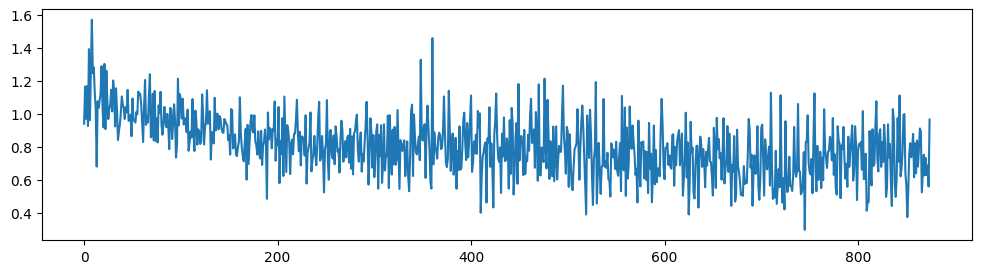

In [14]:
loss_history = trainer.loss_history

plt.figure(figsize=(12,3))
plt.plot(loss_history)
plt.show()

In [ ]:
2